# ЕЩЁ НЕ ЗАКОНЧИЛ ДЗ!!! ПРОВЕРЬТЕ, ПОЖАЛУЙСТА ЧЕРЕЗ ПАРУ ДНЕЙ.

# ОТПРАВИЛ НА ПРОВЕРКУ СЕЙЧАС, Т.К. ОКОШКО ДЛЯ СДАЧИ ЗАКРЫВАЕТСЯ

# Домашнее задание № 4

## по дисциплине: Введение в математический анализ

## Тема: Функции повторение

### выполнил: Евгений Кириллов

### Распределения

1. Какой функции соответствует плотность непрерывного равномерного распределения?

#### ответ: константе

2. Пусть человек заходит на ж/д платформу в произвольный момент времени от 0 до 30 минут. Поезд отходит каждые 30 минут.
Как посчитать вероятность того, что человеку придется ждать более 10 минут?

#### ответ: если человек пришёл на платформу в промежуток от 0 (включительно) до 20 мин. (исключительно), то ему придётся ждать более 10 мин., соответственно 20/30 или 2/3 будет вероятность того, что человеку придется ждать более 10 мин.

3. Каким величинам в реальной жизни соответствует нормальное распределение?

#### ответ: рост, вес людей в популяции  при определённом возрасте, отклонения при стрельбе, количество пассажиров метро в день в каком-то месяце и т.д.

4. Пусть функция плотности нормальной случайной величины имеет следующий вид (1 / (4 sqrt(2pi))) * (exp(-(x+2)**2) / 32).
Найдите параметры матожидания и дисперсии из этой формулы

#### нарисуем график распределения вероятностей

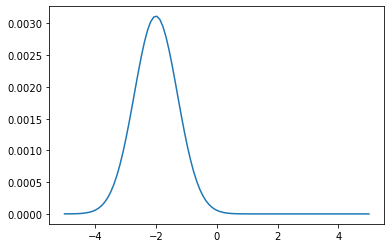

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, 100)
y = [(1 / (4 * math.sqrt(2 * math.pi))) * (math.exp(-(i + 2)**2) / 32) for i in x]

plt.plot(x, y)
plt.show()

#### как видно, матожидание находится около -2, найдём его (матожидания) точное значение

In [2]:
expectation = x[y.index(max(y))]
expectation

-1.9696969696969697

5. На kaggle есть данные о росте 25000 18-летних людей
https://www.kaggle.com/c/2402-heights-and-weights-dataset/data?select=train.csv 
(train датасет)

1) Постройте гистограмму роста 

2) Посчитайте среднее и отклонение

3) Возьмите нормальное распределение с этими параметрами и нарисуйте его на том же графике

4) Убедитесь, что оно визуально аппроксимирует график гистограммы


In [4]:
import numpy as np
import pandas as pd


DATASET_PATH = 'HW_4_task_5_dataset.csv'
df = pd.read_csv(DATASET_PATH)

df

,Id,height,weight
0,1,70.49366,129.3840
1,2,65.23482,104.5786
2,3,67.59619,131.7669
3,4,68.51919,135.0276
4,5,67.07600,118.4065
...,...,...,...
19995,19996,66.69938,126.4284
19996,19997,70.60422,133.7741
19997,19998,67.57167,127.7977
19998,19999,69.83352,124.5901


In [5]:
height = df['height'].sort_values()

In [6]:
height.head(3)

13350    60.61265
4470     60.80620
16656    61.30021
Name: height, dtype: float64

In [7]:
height.tail(3)

10511    74.74047
13655    75.11519
18011    75.15280
Name: height, dtype: float64

#### гистограмма роста

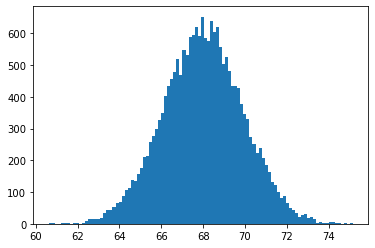

In [8]:
import matplotlib.pyplot as plt


plt.hist(height, bins=100)

plt.show()

#### среднее

In [9]:
height.mean()

67.99522718899979

#### дисперсия

In [10]:
sum((height - height.mean()) ** 2) / height.shape[0]

3.6058849497136443

#### среднеквадратическое отклонение

In [11]:
import math


math.sqrt(sum((height - height.mean()) ** 2) / height.shape[0])

1.8989167832513474

#### то же самое, но штатной функцией

In [12]:
np.std(height)

1.8989167832513474

#### нормальное распределение

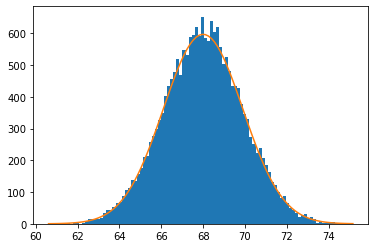

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt


mean = height.mean()
std = np.std(height)

x = np.linspace(min(height), max(height), 100)
y = [((np.pi * std) * np.exp(-0.5 * ((i - mean) / std) ** 2)) for i in x]
y = [i * 100 for i in y]

plt.hist(height, bins=100)
plt.plot(x, y)

plt.show()

### Линейная регрессия

X- уровень месячной зарплаты

Y- число уволившихся сотрудников

X 100 150 200 250 300

Y 60 35 20 20 15

Найти уравнение линейной регрессии Y на X  (вручную или используя встроенные библиотеки)

Предскажите значение при X=310

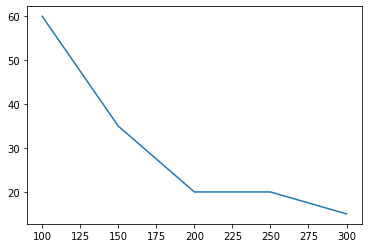

In [14]:
import matplotlib.pyplot as plt


x = [100, 150, 200, 250, 300]
y = [60, 35, 20, 20, 15]

plt.plot(x, y)

plt.show()

In [23]:
x_mean = np.array(x).mean()
x_mean

200.0

In [24]:
y_mean = np.array(y).mean()
y_mean

30.0

In [20]:
sum_of_all_x_and_y_multiplications = sum([i * ii for i, ii in zip(x, y)])
sum_of_all_x_and_y_multiplications

24750

In [21]:
sum_of_all_x_in_pow_2 = sum([i ** 2 for i in x])
sum_of_all_x_in_pow_2

225000

In [25]:
alpha = (sum_of_all_x_and_y_multiplications - len(x) * x_mean * y_mean) / (sum_of_all_x_in_pow_2 - len(x) * x_mean ** 2)
alpha

-0.21

In [26]:
beta = y_mean - alpha * x_mean
beta

72.0

#### ответ: y = (-0.21) * x + 72

#### значение при X=310

In [27]:
y = (-0.21) * 310 + 72
y

6.900000000000006

#### изобразим графически линейную регрессию

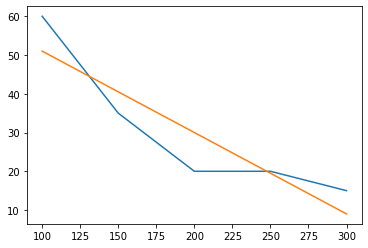

In [33]:
import matplotlib.pyplot as plt
import numpy as np


x = [100, 150, 200, 250, 300]
y = [60, 35, 20, 20, 15]

x_ = np.linspace(100, 300, 100)
y_ = [((-0.21) * i + 72) for i in x_]

plt.plot(x, y)
plt.plot(x_, y_)

plt.show()

### Логистическая регрессия

Какая функция лежит в основе модели логистической регресии? Как перевести вещественные числа в значения на отрезке от 0 до 1 ?